In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a simpler CNN model with fewer parameters
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Reduced number of filters
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),  # Reduced number of neurons
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_data=(test_images, test_labels))

# Save the trained model
model.save('mnist_simple_cnn.h5')
print('Model saved to mnist_simple_cnn.h5')



Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7648 - loss: 0.7899 - val_accuracy: 0.9371 - val_loss: 0.2170
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9440 - loss: 0.1960 - val_accuracy: 0.9555 - val_loss: 0.1536
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9617 - loss: 0.1324 - val_accuracy: 0.9672 - val_loss: 0.1103


Model saved to mnist_simple_cnn.h5


In [88]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [89]:

# Load the trained model
loaded_model = models.load_model('mnist_simple_cnn.h5')
print('Loaded model from mnist_simple_cnn.h5')

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Loaded model from mnist_simple_cnn.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1270
Test accuracy: 0.967199981212616


In [96]:

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Load the trained model
loaded_model = tf.keras.models.load_model('mnist_simple_cnn.h5')
print('Loaded model from mnist_simple_cnn.h5')

Loaded model from mnist_simple_cnn.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label: 5
Confidence: 0.9450
Actual label: 0


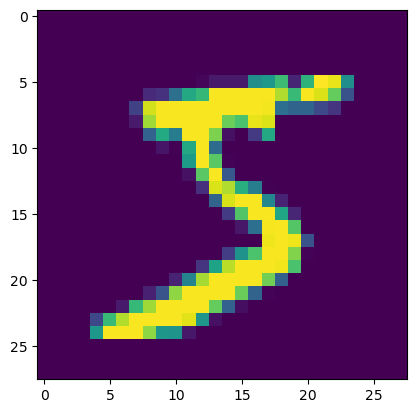

In [97]:
# Select an image from the training set
index = 0  # You can change this index to select a different image
selected_image = train_images[index]
selected_label = train_labels[index]

# Predict the label of the selected image
selected_image = np.expand_dims(selected_image, axis=0)  # Add batch dimension
predictions = loaded_model.predict(selected_image)
predicted_label_index = np.argmax(predictions, axis=1)
predicted_confidence = np.max(predictions, axis=1)

# Print the predicted label, confidence, and actual label
print(f'Predicted label: {predicted_label_index[0]}')
print(f'Confidence: {predicted_confidence[0]:.4f}')
print(f'Actual label: {np.argmax(selected_label)}')
plt.figure()
plt.imshow(train_images[index] * 0.5 + 0.5)

In [98]:
# Loss object for categorical crossentropy
loss_object = tf.keras.losses.CategoricalCrossentropy()

def fgsm_attack(image, original_label, epsilon=0.1):
    # Ensure the image has the correct shape and expand dimensions to match the model's input shape
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        # Get the model prediction
        prediction = loaded_model(image, training=False)

        # Ensure the original label has the correct shape
        original_label = tf.convert_to_tensor(original_label, dtype=tf.float32)
        original_label = tf.expand_dims(original_label, axis=0)

        # Compute the loss
        loss = loss_object(original_label, prediction)

    # Get the gradients of the loss w.r.t to the input image
    gradient = tape.gradient(loss, image)
    # Get the sign of the gradients
    signed_grad = tf.sign(gradient)
    # Create the adversarial image by adding epsilon * sign(gradient) to the original image
    adversarial_image = image + epsilon * signed_grad
    # Clip the adversarial image to ensure it stays within the valid pixel range [0, 1]
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
    
    return adversarial_image.numpy()[0]  # Remove the batch dimension for simplicity


Adversarial samples for epsilon: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


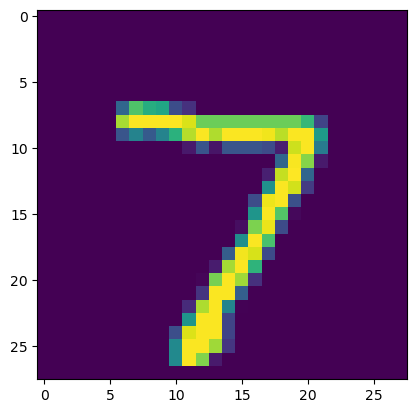

Adversarial prediction: 7
Adversarial confidence: 0.9989718198776245


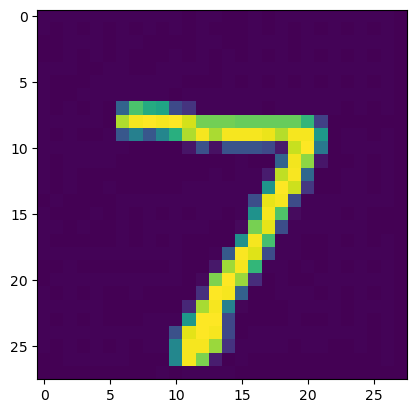

Adversarial samples for epsilon: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


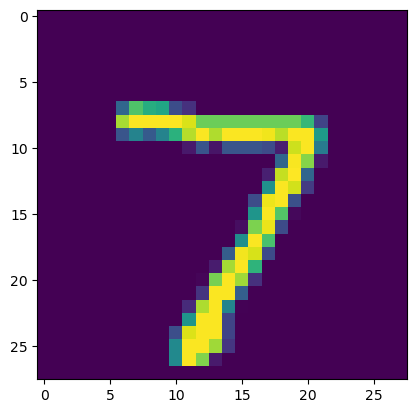

Adversarial prediction: 7
Adversarial confidence: 0.9362053871154785


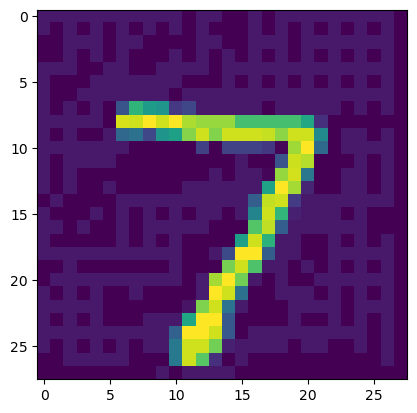

Adversarial samples for epsilon: 0.005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


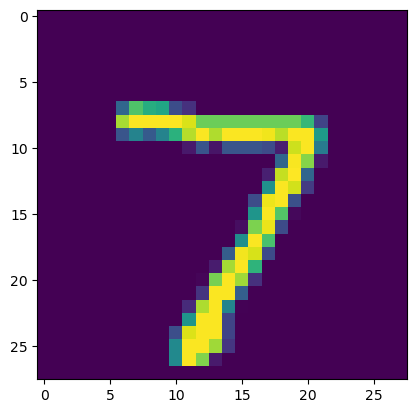

Adversarial prediction: 7
Adversarial confidence: 0.9992142915725708


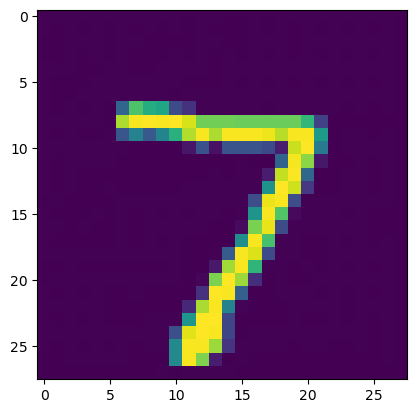

Adversarial samples for epsilon: 0.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


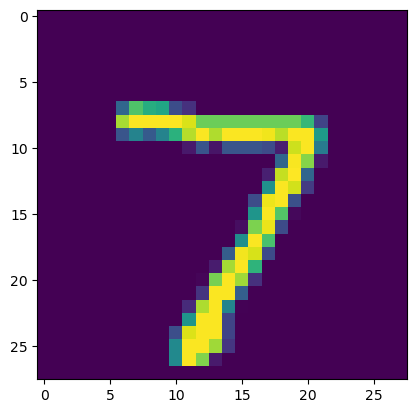

Adversarial prediction: 7
Adversarial confidence: 0.6054943799972534


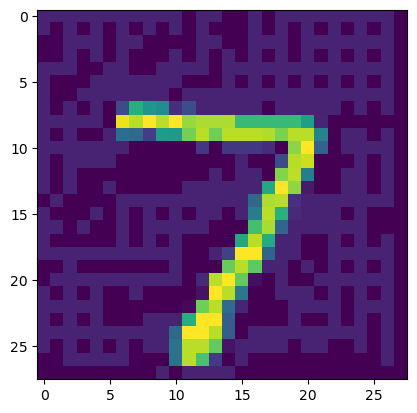

Adversarial samples for epsilon: 0.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


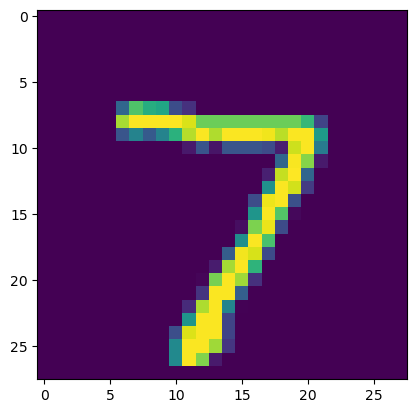

Adversarial prediction: 3
Adversarial confidence: 0.9294260144233704


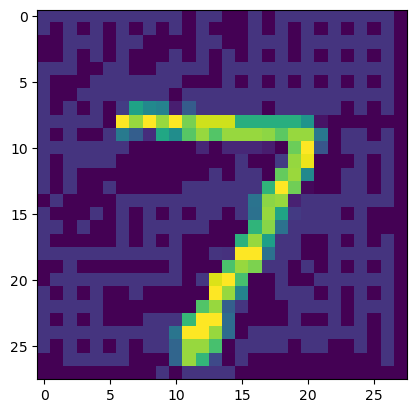

Adversarial samples for epsilon: 0.2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Original prediction: 7
Original confidence: 0.9994051456451416


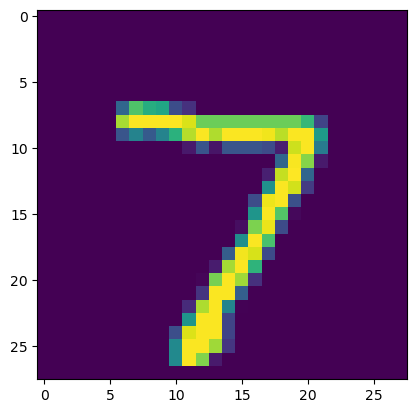

Adversarial prediction: 3
Adversarial confidence: 0.9777590036392212


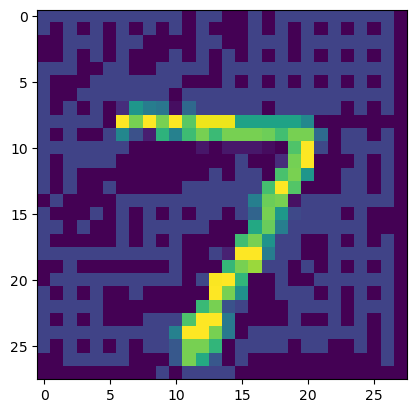

In [99]:

# Select an image from the test set
index = 0  # You can change this index to select a different image
selected_image = test_images[index]
original_label = test_labels[index]

# One-hot encode the original label
original_label = tf.keras.utils.to_categorical(original_label, num_classes=10)

for epsilon in [0.01,0.07,0.005,0.1,0.15,0.2]:
    print(f'\033[1mAdversarial samples for epsilon: {epsilon}\033[0m')
    # Generate adversarial example
    adversarial_image = fgsm_attack(selected_image, original_label, epsilon)

    # Predict the label of the original and adversarial image
    original_confidence = np.max(loaded_model.predict(np.expand_dims(selected_image, axis=0)), axis=1)
    original_prediction = np.argmax(loaded_model.predict(np.expand_dims(selected_image, axis=0)), axis=1)
    adversarial_prediction = np.argmax(loaded_model.predict(np.expand_dims(adversarial_image, axis=0)), axis=1)
    adversarial_confidence = np.max(loaded_model.predict(np.expand_dims(adversarial_image, axis=0)), axis=1)


    # Print the predicted labels
    print(f'Original prediction: {original_prediction[0]}')
    print(f'Original confidence: {original_confidence[0]}')
    plt.figure()
    plt.imshow(selected_image * 0.5 + 0.5)
    plt.show()
    print(f'Adversarial prediction: {adversarial_prediction[0]}')
    print(f'Adversarial confidence: {adversarial_confidence[0]}')
    plt.figure()
    plt.imshow(adversarial_image * 0.5 + 0.5)
    plt.show()